In [1]:
from keras.datasets import mnist

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
ls

Untitled.ipynb
derby.log
generate-train-test-sample-from-hr4-catalog-N200.ipynb
generate-train-test-sample-from-hr4-catalog-N800.ipynb
generate-train-test-sample-from-hr4-catalog.ipynb
graph_big_step1_divide_to_30x30x30_pieces-v4-equal-abundance.ipynb
graph_big_step1_divide_to_31x31x31_pieces-v4-equal-abundance.ipynb
graph_big_step1_divide_to_L150_pieces-v4-equal-abundance.ipynb
hrdata.parquet.snappy
keras-train-hr-N200.ipynb
keras-train-hr-N800.ipynb
keras-train-hr.ipynb
log.log
metastore_db/
random-sample-generator-edge-projection.ipynb
read-trim-big-csv-to-dataframe-then-save-to-parquet.ipynb
result_sample.png
sample.png
sample400.png
sample800.png
testRand200.pickle
testRand400.pickle
testRand800.pickle
trainRand200.pickle
trainRand400.pickle
trainRand800.pickle


In [4]:
# Load the original images 
import pickle

with open('trainRand400.pickle','rb') as f:
    X_train, y_train_tmp = pickle.load(f)
f.close() #keep dumping the current results to overwrite the pickle. 

with open('testRand400.pickle','rb') as f:
    X_test, y_test_tmp = pickle.load(f)
f.close() #keep dumping the current results to overwrite the pickle. 



In [5]:
X_train.shape

(40000, 1200)

In [6]:
y_train_tmp.shape

(40000,)

## Multilayer Perceptrons 

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train_tmp)
y_test = np_utils.to_categorical(y_test_tmp)
num_classes = y_test.shape[1]

In [9]:
y_train.shape

(40000, 2)

In [10]:
y_test.shape

(14000, 2)

In [11]:
y_train[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

### Visualize the samples

In [12]:
numhalo=400

In [13]:
ix = np.arange(numhalo)*3
iy = np.arange(numhalo)*3 + 1
iz = np.arange(numhalo)*3 + 2

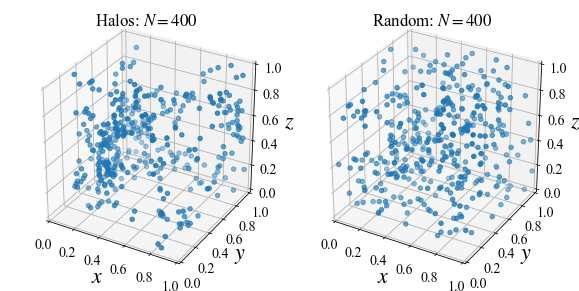

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 14})
plt.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(121, projection='3d')
ax.set_title(r'Halos: $N = 400$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.scatter(X_train[0,ix],X_train[0,iy],X_train[0,iz])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)

ax = fig.add_subplot(122, projection='3d')
ax.set_title(r'Random: $N = 400$')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.scatter(X_train[2,ix],X_train[2,iy],X_train[2,iz])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)




plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('sample.png')

plt.show()

In [15]:
num_pixels = 1200
num_neurons = 400
# define baseline model
def new_baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
%%time
# build the model
model = new_baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=500, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 40000 samples, validate on 14000 samples
Epoch 1/20
 - 2s - loss: 0.7788 - acc: 0.4960 - val_loss: 0.7015 - val_acc: 0.4956
Epoch 2/20
 - 1s - loss: 0.6961 - acc: 0.5098 - val_loss: 0.6979 - val_acc: 0.5039
Epoch 3/20
 - 1s - loss: 0.6925 - acc: 0.5192 - val_loss: 0.6951 - val_acc: 0.5077
Epoch 4/20
 - 1s - loss: 0.6900 - acc: 0.5303 - val_loss: 0.6923 - val_acc: 0.5252
Epoch 5/20
 - 1s - loss: 0.6826 - acc: 0.5590 - val_loss: 0.6857 - val_acc: 0.5475
Epoch 6/20
 - 1s - loss: 0.6605 - acc: 0.6244 - val_loss: 0.6469 - val_acc: 0.6510
Epoch 7/20
 - 1s - loss: 0.5936 - acc: 0.7195 - val_loss: 0.5628 - val_acc: 0.7371
Epoch 8/20
 - 1s - loss: 0.5053 - acc: 0.7796 - val_loss: 0.5061 - val_acc: 0.7479
Epoch 9/20
 - 1s - loss: 0.4432 - acc: 0.8123 - val_loss: 0.4478 - val_acc: 0.8006
Epoch 10/20
 - 1s - loss: 0.4022 - acc: 0.8279 - val_loss: 0.4151 - val_acc: 0.8144
Epoch 11/20
 - 1s - loss: 0.3780 - acc: 0.8380 - val_loss: 0.3961 - val_acc: 0.8260
Epoch 12/20
 - 1s - loss: 0.3569 - 

In [17]:
retest = model.predict(X_test[0:20])
print retest

[[2.9539025e-01 7.0460975e-01]
 [8.0283707e-01 1.9716287e-01]
 [9.9305987e-01 6.9401166e-03]
 [7.0705086e-01 2.9294911e-01]
 [9.9487960e-01 5.1203831e-03]
 [7.3041707e-01 2.6958290e-01]
 [9.9995899e-01 4.0970888e-05]
 [3.7047127e-01 6.2952876e-01]
 [1.6448493e-01 8.3551508e-01]
 [5.7086915e-01 4.2913091e-01]
 [9.9120718e-01 8.7928837e-03]
 [9.9879932e-01 1.2006292e-03]
 [8.8296950e-02 9.1170305e-01]
 [3.8181603e-01 6.1818397e-01]
 [2.2328649e-01 7.7671349e-01]
 [1.0202453e-01 8.9797544e-01]
 [8.0159372e-01 1.9840628e-01]
 [9.9968958e-01 3.1039497e-04]
 [3.0402353e-01 6.9597650e-01]
 [6.3575625e-01 3.6424375e-01]]


In [18]:
print y_test_tmp[0:20]

[1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0]


In [19]:
retest[4]

array([0.9948796 , 0.00512038], dtype=float32)

In [20]:
np.array2string(retest[4], formatter={'float_kind':lambda x: "%.3f;" % x})

'[0.995; 0.005;]'

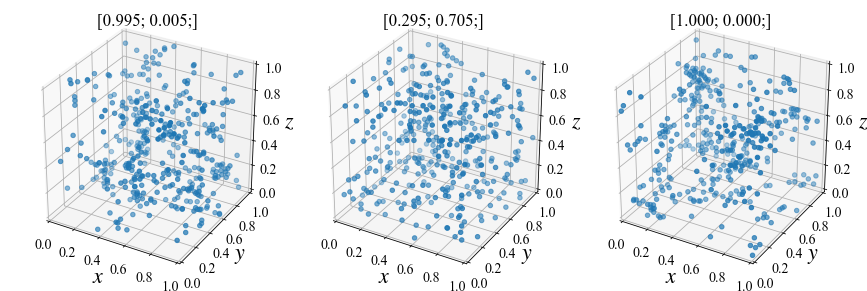

In [21]:
# plot settings
plt.rc('font', family='serif') 
plt.rc('font', serif='Times New Roman') 
plt.rcParams.update({'font.size': 14})
plt.rcParams['mathtext.fontset'] = 'stix'

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(131, projection='3d')
ax.set_title(np.array2string(retest[4], formatter={'float_kind':lambda x: "%.3f;" % x}))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.scatter(X_test[4,ix],X_test[4,iy],X_test[4,iz])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)

ax = fig.add_subplot(132, projection='3d')
ax.set_title(np.array2string(retest[0], formatter={'float_kind':lambda x: "%.3f;" % x}))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.scatter(X_test[0,ix],X_test[0,iy],X_test[0,iz])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)

ax = fig.add_subplot(133, projection='3d')
ax.set_title(np.array2string(retest[6], formatter={'float_kind':lambda x: "%.3f;" % x}))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

ax.scatter(X_test[6,ix],X_test[6,iy],X_test[6,iz])
ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$z$',fontsize=22)






plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('result_sample.png')

plt.show()

### Try a new one

> Add one more layer

In [22]:
num_pixels = 1200
num_neurons = 400
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(200, kernel_initializer='normal', activation='softmax'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [23]:
%%time
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=500, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 40000 samples, validate on 14000 samples
Epoch 1/20
 - 2s - loss: 0.6932 - acc: 0.4993 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/20
 - 1s - loss: 0.6891 - acc: 0.5343 - val_loss: 0.6763 - val_acc: 0.5907
Epoch 3/20
 - 1s - loss: 0.6375 - acc: 0.7030 - val_loss: 0.6184 - val_acc: 0.6973
Epoch 4/20
 - 1s - loss: 0.5893 - acc: 0.7323 - val_loss: 0.5848 - val_acc: 0.7199
Epoch 5/20
 - 1s - loss: 0.5643 - acc: 0.7402 - val_loss: 0.5518 - val_acc: 0.7452
Epoch 6/20
 - 1s - loss: 0.5331 - acc: 0.7627 - val_loss: 0.5559 - val_acc: 0.7295
Epoch 7/20
 - 1s - loss: 0.5079 - acc: 0.7791 - val_loss: 0.5186 - val_acc: 0.7590
Epoch 8/20
 - 1s - loss: 0.4794 - acc: 0.7999 - val_loss: 0.4824 - val_acc: 0.7902
Epoch 9/20
 - 1s - loss: 0.4472 - acc: 0.8207 - val_loss: 0.4654 - val_acc: 0.7974
Epoch 10/20
 - 1s - loss: 0.4251 - acc: 0.8316 - val_loss: 0.4480 - val_acc: 0.8082
Epoch 11/20
 - 1s - loss: 0.4106 - acc: 0.8369 - val_loss: 0.4396 - val_acc: 0.8091
Epoch 12/20
 - 1s - loss: 0.3924 - 